In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # for linear algebra
import pandas as pd # for data processing and file reading (CSV file etc.)

In [57]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Getting Know Data

In [58]:
df = pd.read_csv("mobilephone_rating.csv")
df.head(10)

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0
5,Huawei Mate 40 Pro,$1199,Oct 2020,136.0,104.0,NaN,NaN,NaN
6,Google Pixel 6 Pro,$899,Oct 2021,135.0,102.0,71.0,90.0,NaN
7,Vivo X70 Pro+,$833,Sep 2021,135.0,NaN,66.0,91.0,NaN
8,Asus Smartphone for Snapdragon Insiders,$1499,Jul 2021,133.0,NaN,77.0,NaN,NaN
9,Xiaomi Mi 10 Ultra,$803,Aug 2020,133.0,88.0,NaN,73.0,NaN


In [59]:
df.tail(10)

,model,price,launch,camera,selfie,audio,display,battery
213,Wiko Power U30,$179,Apr 2021,NaN,NaN,NaN,NaN,86.0
214,Oppo A74 5G,$299,Apr 2021,NaN,NaN,NaN,NaN,78.0
215,Xiaomi Redmi Note 10 5G,$229,Mar 2021,NaN,NaN,NaN,NaN,78.0
216,Oppo A54 5G,$259,Apr 2021,NaN,NaN,NaN,NaN,76.0
217,Vivo Y20s,$199,Oct 2020,NaN,NaN,NaN,NaN,75.0
218,Huawei P40 Lite,$279,Feb 2020,NaN,NaN,NaN,NaN,73.0
219,Wiko Power U20,$159,Jan 2021,NaN,NaN,NaN,NaN,70.0
220,Motorola Moto G9 Power,$229,Nov 2020,NaN,NaN,NaN,NaN,70.0
221,Realme C11,$119,Jun 2020,NaN,NaN,NaN,NaN,61.0
222,Xiaomi Redmi 9,$159,Jun 2020,NaN,NaN,NaN,NaN,54.0


In [9]:
df.columns

Index(['model', 'price', 'launch', 'camera', 'selfie', 'audio', 'display',
       'battery'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    223 non-null    object 
 1   price    223 non-null    object 
 2   launch   223 non-null    object 
 3   camera   184 non-null    float64
 4   selfie   72 non-null     float64
 5   audio    93 non-null     float64
 6   display  64 non-null     float64
 7   battery  54 non-null     float64
dtypes: float64(5), object(3)
memory usage: 14.1+ KB


In [19]:
df.describe()

,camera,selfie,audio,display,battery
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,87.829596,28.112108,27.295964,23.641256,18.004484
std,43.565087,41.659614,32.802471,37.738151,32.379854
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,0.000000,0.000000,0.000000,0.000000
75%,117.000000,78.500000,65.500000,72.000000,0.000000
max,144.000000,106.000000,81.000000,99.000000,96.000000


### Overwiev of data types of each columns

In [13]:
df.dtypes

model       object
price       object
launch      object
camera     float64
selfie     float64
audio      float64
display    float64
battery    float64
dtype: object

## Data Cleaning

In [15]:
df.isnull().any()

model      False
price      False
launch     False
camera      True
selfie      True
audio       True
display     True
battery     True
dtype: bool

In [16]:
df.isnull().sum()

model        0
price        0
launch       0
camera      39
selfie     151
audio      130
display    159
battery    169
dtype: int64

In [60]:
#filling data with 0's
df.fillna(np.nan,inplace=True)
df.head()

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0


In [61]:
df.isnull().sum()

model        0
price        0
launch       0
camera      39
selfie     151
audio      130
display    159
battery    169
dtype: int64

### Get specific data types in dataframe

In [62]:
df.select_dtypes(include=["object"])

,model,price,launch
0,Huawei P50 Pro,$907,Jul 2021
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021
2,Huawei Mate 40 Pro+,$1363,Oct 2020
3,Apple iPhone 13 Pro Max,$1099,Sep 2021
4,Apple iPhone 13 Pro,$999,Sep 2021
...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020
219,Wiko Power U20,$159,Jan 2021
220,Motorola Moto G9 Power,$229,Nov 2020
221,Realme C11,$119,Jun 2020


In [63]:
df.select_dtypes(include=["number"])

,camera,selfie,audio,display,battery
0,144.0,106.0,NaN,93.0,NaN
1,143.0,94.0,71.0,87.0,69.0
2,139.0,NaN,NaN,NaN,NaN
3,137.0,99.0,75.0,99.0,89.0
4,137.0,99.0,75.0,98.0,76.0
...,...,...,...,...,...
218,NaN,NaN,NaN,NaN,73.0
219,NaN,NaN,NaN,NaN,70.0
220,NaN,NaN,NaN,NaN,70.0
221,NaN,NaN,NaN,NaN,61.0


### Make a price $ column by using price column

In [64]:
df['Price $'] = df['price'].str[1:].astype('float64')

In [65]:
df

,model,price,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN,907.0
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN,1363.0
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0,999.0
...,...,...,...,...,...,...,...,...,...
218,Huawei P40 Lite,$279,Feb 2020,NaN,NaN,NaN,NaN,73.0,279.0
219,Wiko Power U20,$159,Jan 2021,NaN,NaN,NaN,NaN,70.0,159.0
220,Motorola Moto G9 Power,$229,Nov 2020,NaN,NaN,NaN,NaN,70.0,229.0
221,Realme C11,$119,Jun 2020,NaN,NaN,NaN,NaN,61.0,119.0


In [66]:
df.select_dtypes(include=["number"])

,camera,selfie,audio,display,battery,Price $
0,144.0,106.0,NaN,93.0,NaN,907.0
1,143.0,94.0,71.0,87.0,69.0,1200.0
2,139.0,NaN,NaN,NaN,NaN,1363.0
3,137.0,99.0,75.0,99.0,89.0,1099.0
4,137.0,99.0,75.0,98.0,76.0,999.0
...,...,...,...,...,...,...
218,NaN,NaN,NaN,NaN,73.0,279.0
219,NaN,NaN,NaN,NaN,70.0,159.0
220,NaN,NaN,NaN,NaN,70.0,229.0
221,NaN,NaN,NaN,NaN,61.0,119.0


In [67]:
df.drop(columns=["price"], axis=1 ,inplace=True)

In [45]:
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.0,NaN,93.0,NaN,907.0
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200.0
2,Huawei Mate 40 Pro+,Oct 2020,139.0,NaN,NaN,NaN,NaN,1363.0
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099.0
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.0,75.0,98.0,76.0,999.0


## Make Distribution of Dataset

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


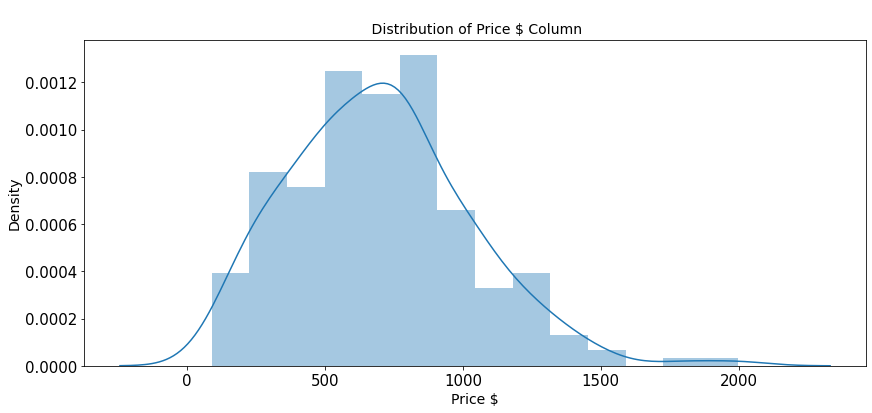

In [68]:
# Price $ column distribution:
plt.figure(figsize=(14,6))
plt.title('\n Distribution of Price $ Column', size=14, color= 'black')
plt.xlabel('Price $', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["Price $"])
plt.show()

In [69]:
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.0,NaN,93.0,NaN,907.0
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.0,71.0,87.0,69.0,1200.0
2,Huawei Mate 40 Pro+,Oct 2020,139.0,NaN,NaN,NaN,NaN,1363.0
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.0,75.0,99.0,89.0,1099.0
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.0,75.0,98.0,76.0,999.0


C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


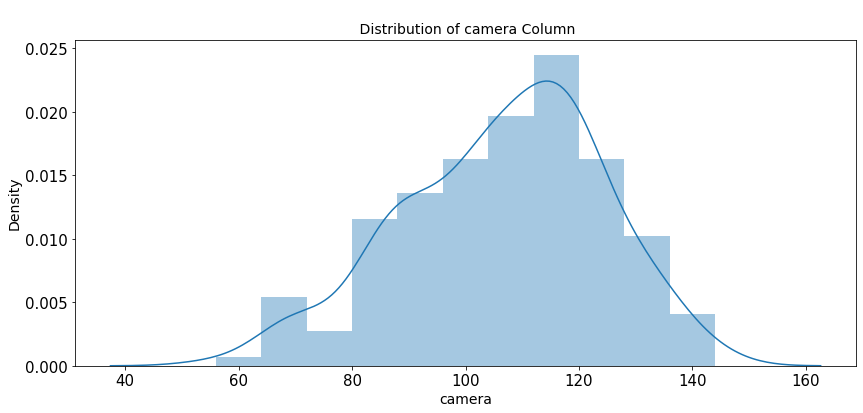

In [70]:
# Let's check how 'camera' column is distributed:

plt.figure(figsize=(14,6))
plt.title('\n Distribution of camera Column', size=14, color= 'black')
plt.xlabel('Selfie', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["camera"])
plt.show()

In [71]:
# Let's fill nan values with mean of column distribution.
df.camera = df.camera.fillna(df.camera.mean())

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


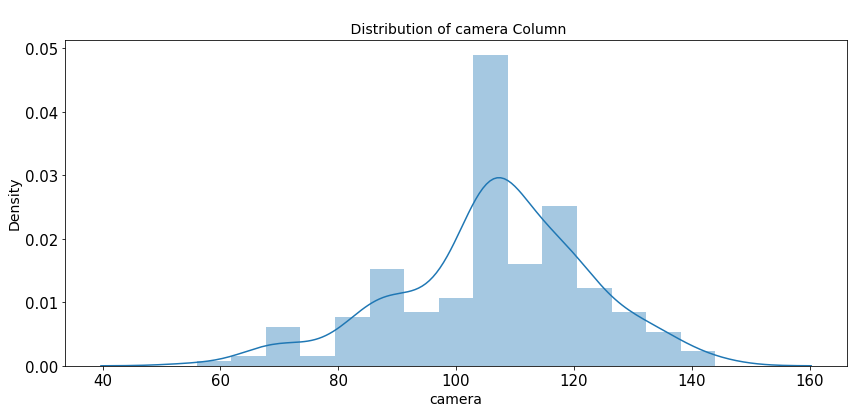

In [73]:
# Let's verify with distribution
plt.figure(figsize=(14,6))
plt.title('\n Distribution of camera Column', size=14, color= 'black')
plt.xlabel('Selfie', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["camera"])
plt.show()

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


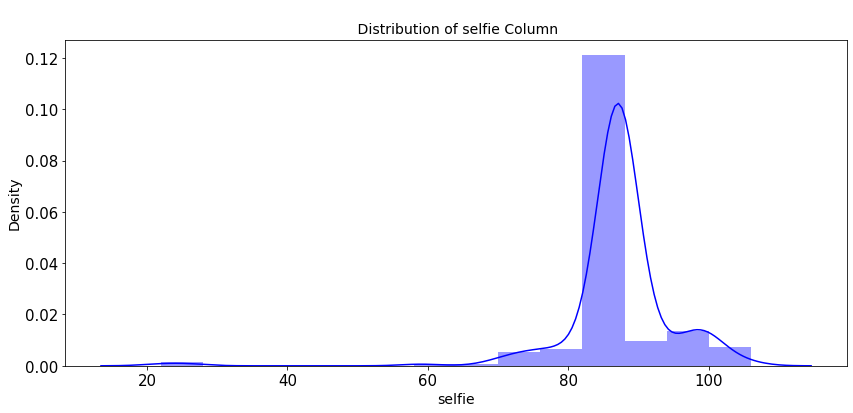

In [79]:
# Let's check how 'selfie' column is distributed:

# For the not make same mistake, first change nan values with mean of column.
df.selfie = df.selfie.fillna(df.selfie.mean())

plt.figure(figsize=(14,6))
plt.title('\n Distribution of selfie Column', size=14, color= 'black')
plt.xlabel('Selfie', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["selfie"], color="blue")
plt.show()

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


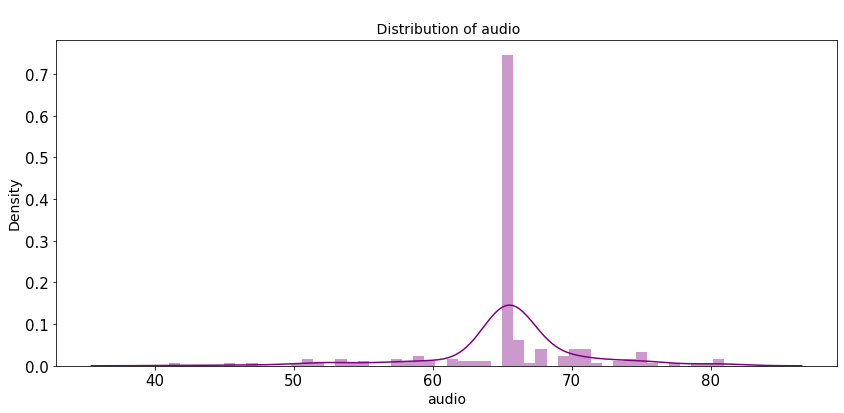

In [80]:
# Let's check how 'audio' column is distributed:

# For the not make same mistake, first change nan values with mean of column.
df.audio = df.audio.fillna(df.audio.mean())

plt.figure(figsize=(14,6))
plt.title('\n Distribution of audio', size=14, color= 'black')
plt.xlabel('Selfie', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["audio"], color="purple")
plt.show()

C:\Users\bunya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


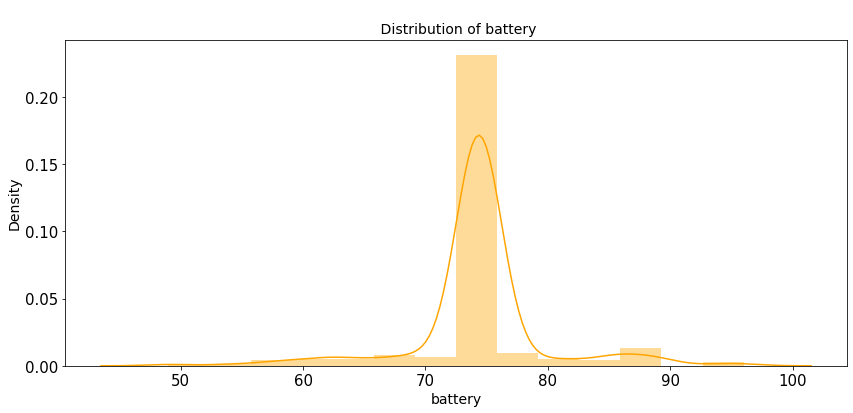

In [81]:
# Let's check how 'battery' column is distributed:

# For the not make same mistake, first change nan values with mean of column.
df.battery = df.battery.fillna(df.battery.mean())

plt.figure(figsize=(14,6))
plt.title('\n Distribution of battery', size=14, color= 'black')
plt.xlabel('Selfie', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.distplot(df["battery"], color="orange")
plt.show()

## Q&A

In [82]:
# First let's look the df
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $
0,Huawei P50 Pro,Jul 2021,144.0,106.000000,65.451613,93.0,74.351852,907.0
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.000000,71.000000,87.0,69.000000,1200.0
2,Huawei Mate 40 Pro+,Oct 2020,139.0,87.069444,65.451613,NaN,74.351852,1363.0
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.000000,75.000000,99.0,89.000000,1099.0
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.000000,75.000000,98.0,76.000000,999.0


### Q1-Which is the most expensive phone ?

In [92]:
df.loc[df["Price $"] ==  df["Price $"].max()]

,model,launch,camera,selfie,audio,display,battery,Price $
90,Samsung Galaxy Z Fold2 5G,Aug 2020,109.0,87.069444,66.0,NaN,74.351852,1999.0


### Q2-Which is the cheapest phone ?

In [93]:
df.loc[df["Price $"] ==  df["Price $"].min()]

,model,launch,camera,selfie,audio,display,battery,Price $
188,Intex Aqua Selfie,Jul 2017,106.445652,22.0,65.451613,NaN,74.351852,89.0


### Q3-Which phone has the lowest battery score ?

In [95]:
df.loc[df["battery"] ==  df["battery"].min()]

,model,launch,camera,selfie,audio,display,battery,Price $
43,Xiaomi Mi 11,Dec 2020,120.0,85.0,68.0,87.0,49.0,799.0


### Q4-Which phone has the highest battery score ?

In [97]:
df.loc[df["battery"] ==  df["battery"].max()]

,model,launch,camera,selfie,audio,display,battery,Price $
96,Oppo Reno6 5G,May 2021,107.0,80.0,58.0,80.0,96.0,499.0


### Q5- Wich phones has price under 685$ ?

In [101]:
df.loc[df["Price $"] < 685].sort_values(by="Price $", ascending=False).head(10)

,model,launch,camera,selfie,audio,display,battery,Price $
177,Samsung Galaxy S5,Apr 2014,70.0,87.069444,65.451613,NaN,74.351852,679.0
71,OnePlus 7 Pro,May 2019,114.0,86.000000,65.000000,NaN,74.351852,669.0
68,Samsung Galaxy S20 FE (Exynos),Sep 2020,115.0,87.069444,65.451613,NaN,74.351852,659.0
13,Vivo X70 Pro (MediaTek),Sep 2021,131.0,87.069444,51.000000,NaN,74.351852,651.0
179,Apple iPhone 5s,Sep 2013,68.0,87.069444,65.451613,NaN,74.351852,649.0
174,Google Nexus 6P,Sep 2015,73.0,87.069444,65.451613,NaN,74.351852,649.0
173,Apple iPhone 6,Sep 2014,73.0,87.069444,65.451613,NaN,74.351852,649.0
125,Google Pixel 2,Oct 2017,99.0,77.000000,65.451613,NaN,74.351852,649.0
144,Google Pixel,Oct 2016,90.0,87.069444,65.451613,NaN,74.351852,649.0
145,HTC U11,Jul 2017,90.0,87.069444,65.451613,NaN,74.351852,649.0


#### You can make similar questions like that

## Brand Distribution

In [127]:
def dist_brand():
    brand_names = []
    for brand in df['model']:
        brands = brand.split()[0]
        brand_names.append(brands)
    df['Brand Count']  = brand_names
dist_brand()

In [128]:
df.head()

,model,launch,camera,selfie,audio,display,battery,Price $,Brand Count
0,Huawei P50 Pro,Jul 2021,144.0,106.000000,65.451613,93.0,74.351852,907.0,Huawei
1,Xiaomi Mi 11 Ultra,Mar 2021,143.0,94.000000,71.000000,87.0,69.000000,1200.0,Xiaomi
2,Huawei Mate 40 Pro+,Oct 2020,139.0,87.069444,65.451613,NaN,74.351852,1363.0,Huawei
3,Apple iPhone 13 Pro Max,Sep 2021,137.0,99.000000,75.000000,99.0,89.000000,1099.0,Apple
4,Apple iPhone 13 Pro,Sep 2021,137.0,99.000000,75.000000,98.0,76.000000,999.0,Apple


In [129]:
df["Brand Count"].value_counts()

Samsung      38
Xiaomi       27
Apple        18
Oppo         17
Huawei       13
OnePlus      12
Vivo         11
Google       10
Asus          9
Motorola      8
Realme        7
LG            6
Sony          5
Black         5
Nokia         4
Honor         4
Nubia         3
Lenovo        3
Wiko          3
Meitu         2
Fairphone     2
HTC           2
Crosscall     2
ZTE           2
TCL           2
Vsmart        1
Meizu         1
Lava          1
General       1
POCO          1
Altice        1
Intex         1
Microsoft     1
Name: Brand Count, dtype: int64

### Show the brand count on pie chart

<AxesSubplot:ylabel='None'>

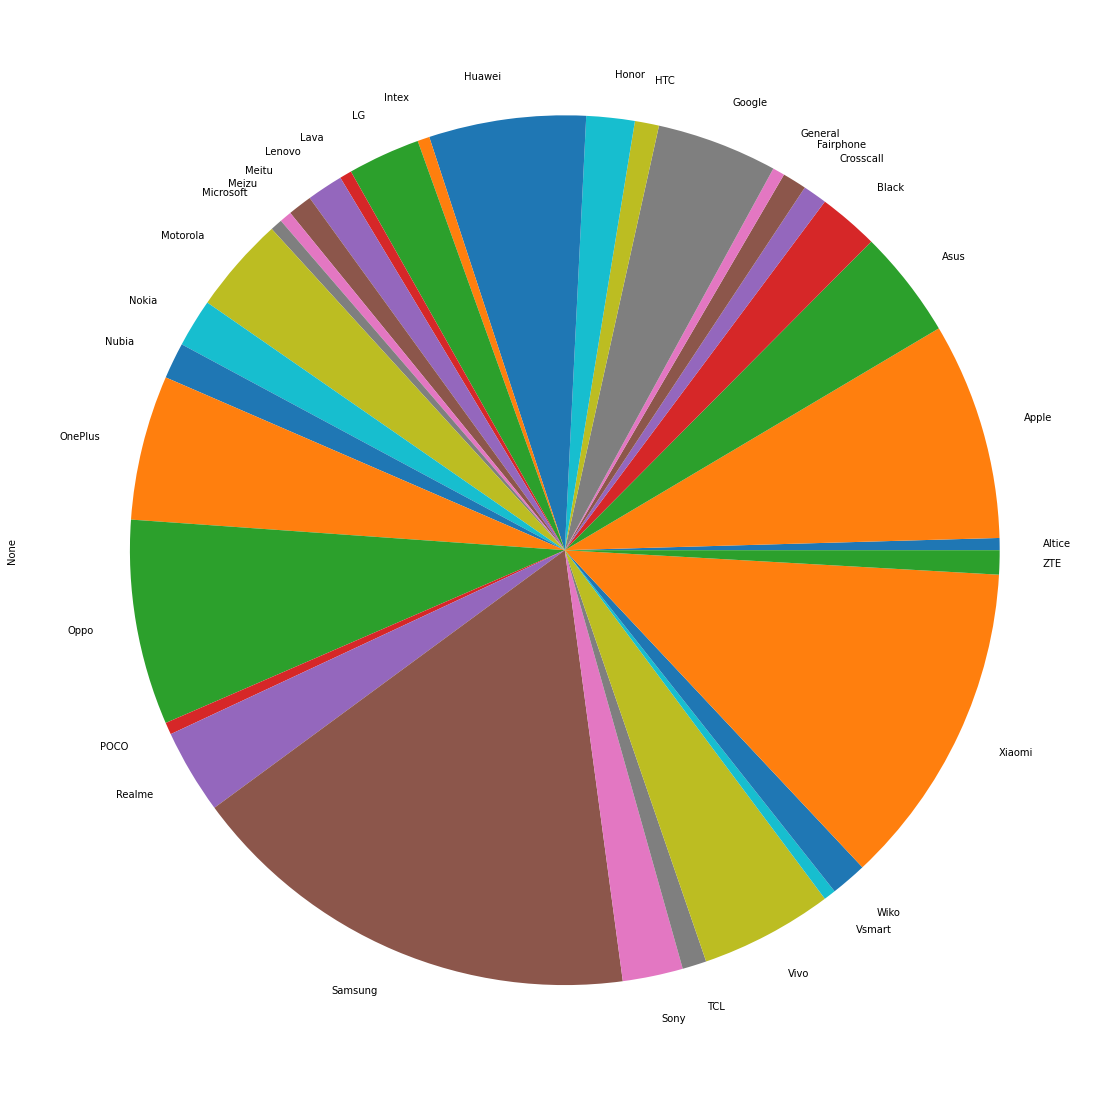

In [134]:
brand_group = df.groupby(['Brand Count']).size()
brand_group.plot.pie(figsize=(20,20))
